Cell 1: Install and Import Required Libraries

In [16]:
# If TensorFlow is not installed, uncomment the below line
# !pip install tensorflow

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


Cell 2: Load the IMDB Dataset

In [17]:
# Load the IMDB dataset
# num_words=10000 means we'll only keep the top 10,000 most frequently occurring words
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

print(f"Training samples: {len(x_train)}, Test samples: {len(x_test)}")


Training samples: 25000, Test samples: 25000


Cell 3: Explore the Data (Optional)

In [18]:
# Let's see what a sample review looks like (it's encoded as integers)
print(x_train[0])
print(f"Label: {y_train[0]}")  # 1 = positive, 0 = negative


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label: 1


Cell 4: Decode the Integers Back to Words (Optional, for understanding)

In [19]:
# Get the word index mapping (words -> integer)
word_index = keras.datasets.imdb.get_word_index()

# Reverse the word index (integer -> word)
reverse_word_index = {value: key for (key, value) in word_index.items()}

# Decode function
def decode_review(text):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in text])

print(decode_review(x_train[0]))


? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Cell 5: Preprocessing - Pad the Sequences

In [20]:
# Pad sequences so that all inputs are the same length
# (because DNN expects inputs of fixed size)

maxlen = 256  # maximum review length
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

print(f"Padded shape: {x_train.shape}")


Padded shape: (25000, 256)


Cell 6: Build the Deep Neural Network Model

In [21]:
# Build a simple DNN
model = keras.Sequential([
    layers.Embedding(input_dim=10000, output_dim=16, input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output: probability between 0 and 1
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 👉 Build the model manually (ADD THIS LINE)
model.build(input_shape=(None, maxlen))

# 👉 Now show the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 256, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,289 (626.13 KB)

 Trainable params: 160,289 (626.13 KB)

 Non-trainable params: 0 (0.00 B)

Cell 7: Train the Model

In [22]:
# Train the model
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5651 - loss: 0.6913 - val_accuracy: 0.6632 - val_loss: 0.6799
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6951 - loss: 0.6747 - val_accuracy: 0.7438 - val_loss: 0.6484
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7550 - loss: 0.6370 - val_accuracy: 0.7754 - val_loss: 0.5935
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7865 - loss: 0.5777 - val_accuracy: 0.8036 - val_loss: 0.5315
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8248 - loss: 0.5119 - val_accuracy: 0.8132 - val_loss: 0.4745
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8363 - loss: 0.4505 - val_accuracy: 0.8272 - val_loss: 0.4316
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8519 - loss: 0.4047 - val_accuracy: 0.8482 - val_loss: 0.3950
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8663 - loss: 0.3686 - val_accuracy: 0.8536 - v

Cell 8: Evaluate the Model on Test Data

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_acc:.3f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8500 - loss: 0.3466
Test Accuracy: 0.850


Cell 9: Plot Training and Validation Accuracy/Loss (Optional)

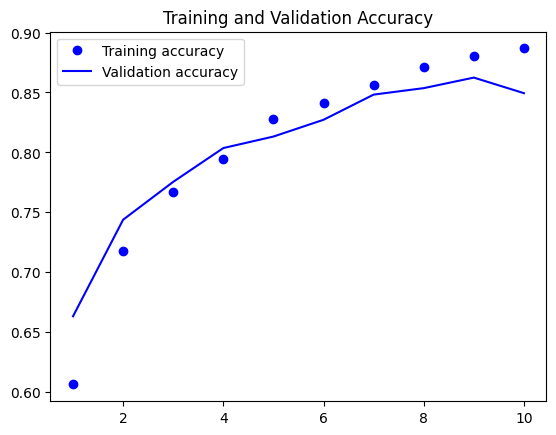

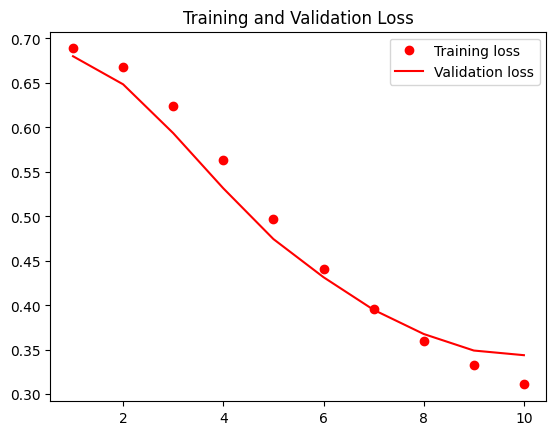

In [25]:
import matplotlib.pyplot as plt

# Get accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Plot accuracy
plt.plot(epochs_range, acc, 'bo', label='Training accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(epochs_range, loss, 'ro', label='Training loss')
plt.plot(epochs_range, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Cell 10: Write Functions to Predict Sentiment for New Reviews

In [26]:
# Load word index again
word_index = keras.datasets.imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}  # shift by 3 to match training
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = {value: key for (key, value) in word_index.items()}

# Function to encode a review into integers
def encode_review(text):
    tokens = text.lower().split()
    encoded = [1]  # 1 is for <START>
    for word in tokens:
        if word in word_index:
            encoded.append(word_index[word])
        else:
            encoded.append(2)  # 2 is for <UNK> (unknown word)
    return encoded


Cell 11: Make Sentiment Prediction for Custom Text

In [47]:
def predict_sentiment(review_text):
    encoded = encode_review(review_text)
    padded = keras.preprocessing.sequence.pad_sequences([encoded], maxlen=256)
    prediction = model.predict(padded)[0][0]

    print(f"Review: {review_text}")
    print(f"Predicted Sentiment Score: {prediction:.3f}")

    if prediction > 0.75:
        print("Sentiment: Positive 😊")
    else:
        print("Sentiment: Negative 😞")


Cell 12: Try Some Example Reviews!

In [48]:
# Example 1
predict_sentiment("The movie was fantastic and had a great story!")

# Example 2
predict_sentiment("The film was boring and a complete waste of time.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Review: The movie was fantastic and had a great story!
Predicted Sentiment Score: 0.832
Sentiment: Positive 😊
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Review: The film was boring and a complete waste of time.
Predicted Sentiment Score: 0.564
Sentiment: Negative 😞


In [49]:
predict_sentiment("Titanic was an emotional masterpiece with brilliant performances.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Review: Titanic was an emotional masterpiece with brilliant performances.
Predicted Sentiment Score: 0.810
Sentiment: Positive 😊


In [50]:
predict_sentiment("The movie was very boring and too slow.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Review: The movie was very boring and too slow.
Predicted Sentiment Score: 0.694
Sentiment: Negative 😞


In [51]:
predict_sentiment("I absolutely loved the action scenes!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Review: I absolutely loved the action scenes!
Predicted Sentiment Score: 0.799
Sentiment: Positive 😊
